In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


In [2]:
url='https://raw.githubusercontent.com/baren-kumar/ML-for-DS/refs/heads/main/telecom-dataset.csv'
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
y = df['custcat']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [11]:
!pip install scikit-learn

In [14]:
from sklearn.neighbors import KNeighborsClassifier


In [15]:
k_range = range(1, 26)


In [16]:
# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.275, 0.31, 0.275, 0.26, 0.3, 0.29, 0.345, 0.325, 0.32, 0.32, 0.345, 0.33, 0.32, 0.335, 0.355, 0.32, 0.335, 0.34, 0.355, 0.345, 0.33, 0.345, 0.345, 0.34, 0.335]


In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Testing Accuracy')

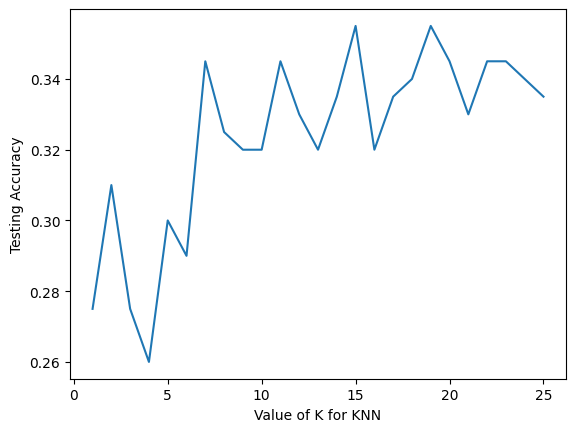

In [18]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [19]:
k = 7
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [20]:
predictions = neigh.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.53      0.43        51
           2       0.36      0.23      0.28        44
           3       0.34      0.41      0.37        54
           4       0.30      0.20      0.24        51

    accuracy                           0.34       200
   macro avg       0.34      0.34      0.33       200
weighted avg       0.34      0.34      0.33       200

Confusion Matrix:
 [[27  6 13  5]
 [ 8 10 18  8]
 [18  4 22 10]
 [21  8 12 10]]
Accuracy Score: 0.345


In [21]:
new_observation = [[2,11,0,22,0,1,40,3,5,0,1]]
neigh.predict(new_observation)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])